In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-source/Mall_Customers.csv


# Import Libraries

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder,StandardScaler

# Load data

In [3]:
df=pd.read_csv('/kaggle/input/data-source/Mall_Customers.csv',index_col="CustomerID")

# Explore data¶

In [4]:
df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76
7,Female,35,18,6
8,Female,23,18,94
9,Male,64,19,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [6]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


# Data Preprocessing¶

In [7]:
df.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
la=LabelEncoder()

In [9]:
df.Gender=la.fit_transform(df.Gender)

In [10]:
scaler=StandardScaler()

In [11]:
columns=df.columns

In [12]:
df_scaled=pd.DataFrame(scaler.fit_transform(df[columns]),index=df.index,columns=columns)

# Train model

In [13]:
def get_best_cluster(data,n_cluster):
    acc={}
    for k in range(1,n_cluster):
        model=KMeans(n_clusters=k,n_init=15)
        model.fit(data)
        acc[k]=model.inertia_
    plt.plot(acc.keys(),acc.values(),marker=".")
    plt.xlabel("Count of Clusters")
    plt.ylabel("Error")
    plt.title("Find the best numbers of Clustering for Kmeans")
    return acc

In [14]:
def train_plot(data,n_clusters):
    data=data.copy()
    model=KMeans(n_clusters=n_clusters,n_init=50)
    pre=model.fit_predict(data)
    data['Group']=pre
    for k in range(n_clusters):
        plt.scatter(data[data['Group']==k]["Annual Income (k$)"],data[data['Group']==k]["Spending Score (1-100)"],
                    label=f"Group {k+1}")
    plt.title("Customer Groups")
    plt.xlabel("Annual Income")
    plt.ylabel("Spending Score")
    plt.legend()
    return pre

{1: 308862.06,
 2: 212889.44245524297,
 3: 143391.59236035676,
 4: 104414.67534220166,
 5: 75399.61541401483,
 6: 58348.641363315044,
 7: 51132.7032125769,
 8: 44355.31351771352,
 9: 40621.19205794206,
 10: 37175.97669994118,
 11: 34755.63558180326}

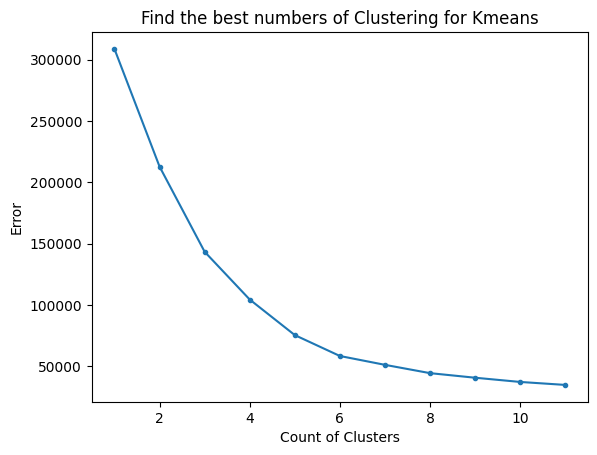

In [15]:
acc_df=get_best_cluster(df,12)
acc_df

{1: 800.0,
 2: 588.8026767824936,
 3: 476.78755441351586,
 4: 386.71478577406873,
 5: 326.4182681764844,
 6: 278.8918973476028,
 7: 235.4309961723149,
 8: 199.81861761323984,
 9: 174.11984372928396,
 10: 152.06108458679108,
 11: 137.1981688818106}

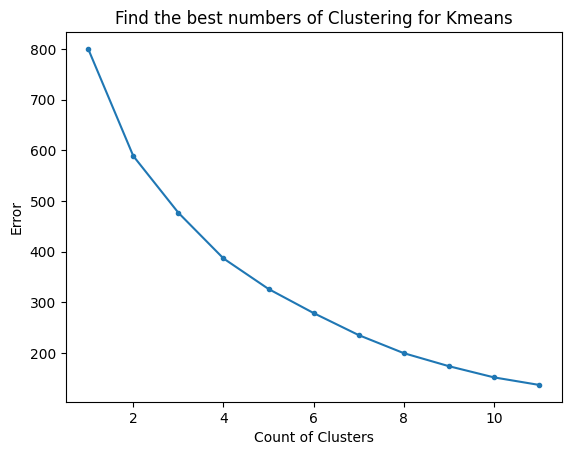

In [16]:
acc_scaled=get_best_cluster(df_scaled,12)
acc_scaled

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

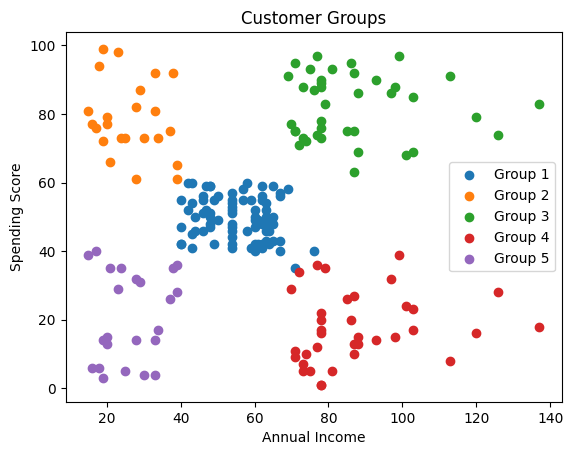

In [17]:
Groups=train_plot(df,5)
Groups

# Analysis

In [18]:
df["Groups"]=Groups+1 # to avoid zero based and make it clear 
df["Gender"]=la.inverse_transform(df["Gender"])
colors = sns.color_palette("Set2")

<Axes: ylabel='count'>

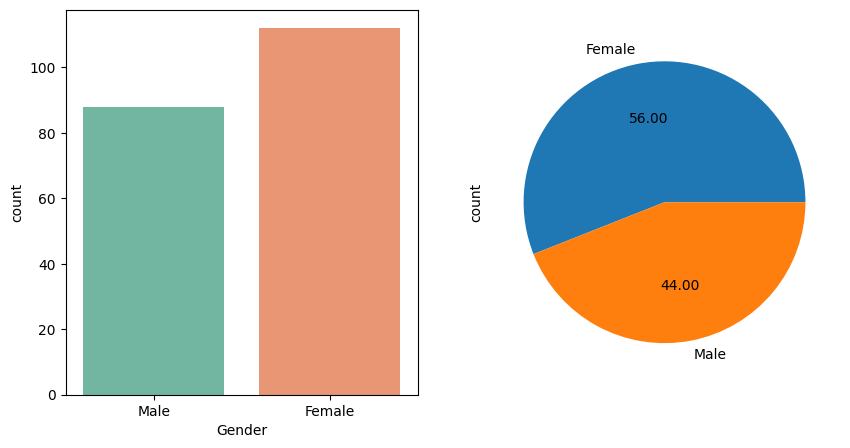

In [19]:
plt.figure(figsize=(10, 5))
ax1 = plt.subplot(121)
ax2=plt.subplot(122)
sns.countplot(x='Gender', data=df, palette=colors,ax=ax1)
df['Gender'].value_counts().plot.pie(autopct='%0.2f',ax=ax2)

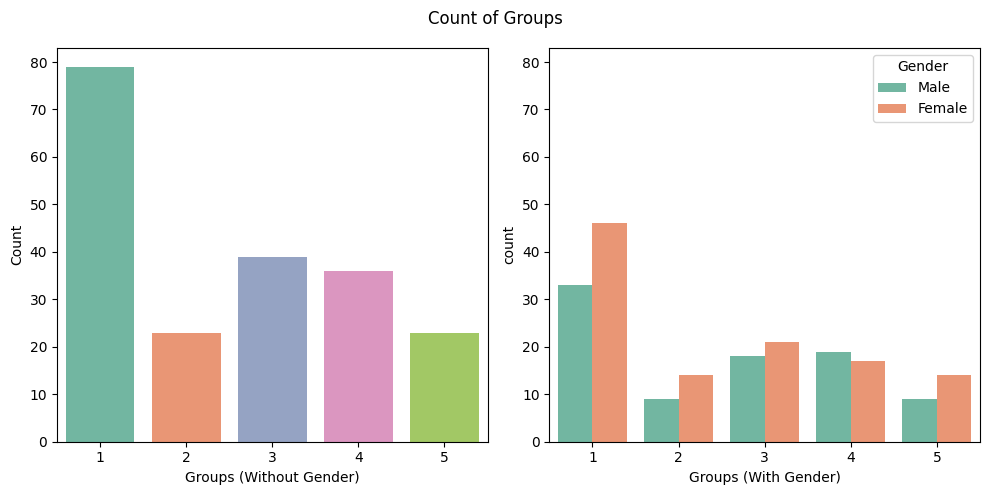

In [20]:
# Create the count plot without 'Gender'
plt.figure(figsize=(10, 5))
ax1 = plt.subplot(121)
sns.countplot(x='Groups', data=df, palette=colors, ax=ax1)

# Create the count plot with 'Gender'
ax2 = plt.subplot(122, sharey=ax1)
sns.countplot(x='Groups', hue='Gender', data=df, palette=colors, ax=ax2)

# Set labels and title
ax1.set_xlabel('Groups (Without Gender)')
ax2.set_xlabel('Groups (With Gender)')
ax1.set_ylabel('Count')
plt.suptitle('Count of Groups')

# Show the plot
plt.tight_layout()

<Axes: ylabel='count'>

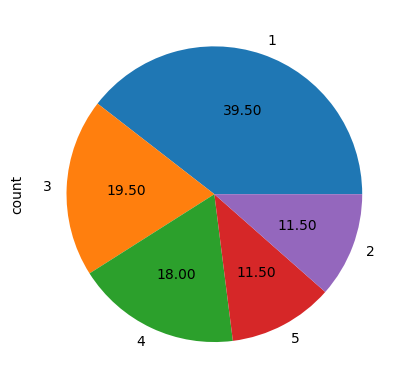

In [21]:
df['Groups'].value_counts().plot.pie(autopct='%0.2f')

<Axes: xlabel='Groups', ylabel='Spending Score (1-100)'>

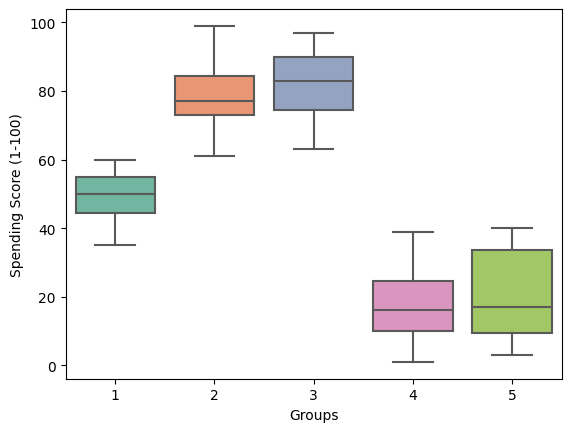

In [22]:
sns.boxplot(x="Groups",y="Spending Score (1-100)",data=df,palette='Set2')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

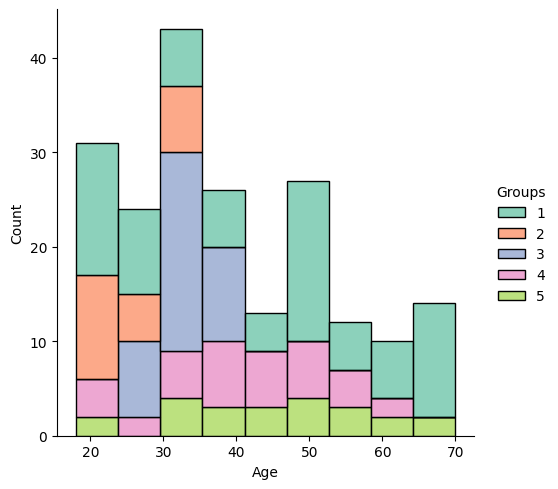

In [23]:
sns.displot(df, x='Age', hue='Groups', kind='hist', palette='Set2', multiple='stack')